# Interest Points and Corner Detection

An interest point is A rich image content within a local image window. It has well defined signature for comparing with other points and is invariant to image rotation and scaling and insensitive to lighting changes.

### Corner Detection

It is a concept of detecting a corner in an image that can be done by observing a change in both directions.

#### Importing required libararies

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#### Loading Image

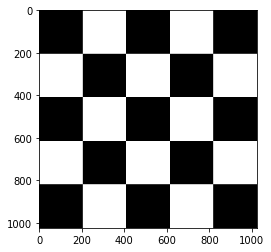

In [2]:
image = cv.imread("checkerboard.png")
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray")

#### Step 1: Compute Image Derivates

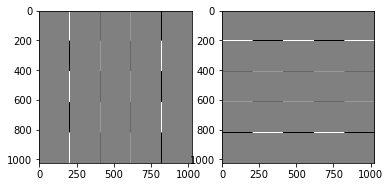

In [3]:
Ix = cv.Sobel(image_gray, cv.CV_64F, 1, 0, ksize=5)
Iy = cv.Sobel(image_gray, cv.CV_64F, 0, 1, ksize=5)

plt.subplot(121)
plt.imshow(Ix, cmap="gray")

plt.subplot(122)
plt.imshow(Iy, cmap="gray")

#### Step 2: Calculate 2-by-2 Moment Matrix

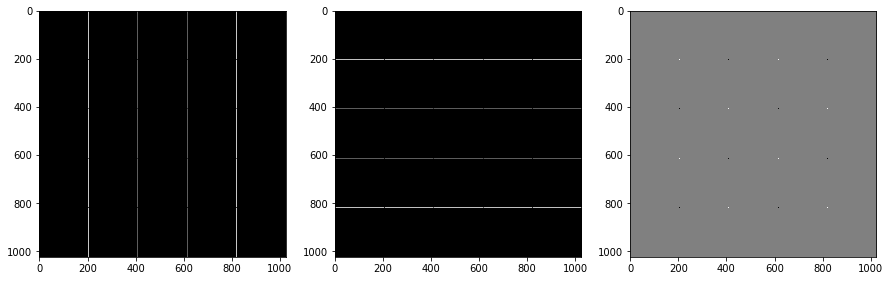

In [4]:
Ix2 = np.multiply(Ix, Ix)
Iy2 = np.multiply(Iy, Iy)
IxIy = np.multiply(Ix,Iy)

plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(Ix2, cmap="gray")

plt.subplot(132)
plt.imshow(Iy2, cmap="gray")

plt.subplot(133)
plt.imshow(IxIy, cmap="gray")

#### Step 3: Smoothen 2-by-2 Moment Matrix components

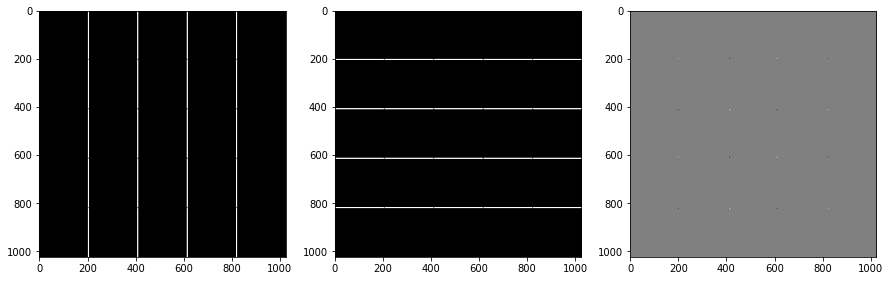

In [5]:
SIx2 = cv.blur(Ix2, (5,5))
SIy2 = cv.blur(Iy2, (5,5))
SIxIy = cv.blur(IxIy, (5,5))

plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(SIx2, cmap="gray")

plt.subplot(132)
plt.imshow(SIy2, cmap="gray")

plt.subplot(133)
plt.imshow(SIxIy, cmap="gray")

#### Step 4: Find Eigen Values of Moment Matrix to detect Corner 

In [6]:
def detect_corners(SIx2, SIy2, SIxIy):
    alpha = 0.06
    R = np.zeros(SIx2.shape, dtype='float32')
    for (x,y), _ in np.ndenumerate(SIx2):
        M = np.array([[SIx2[x,y], SIxIy[x,y]], [SIxIy[x,y], SIy2[x,y]]])
        lab,_ = np.linalg.eig(M)
        R[x,y] = lab[0]*lab[1] - alpha*(lab[0] + lab[1])*(lab[0] + lab[1])
    return R

In [7]:
result = detect_corners(SIx2, SIy2, SIxIy)

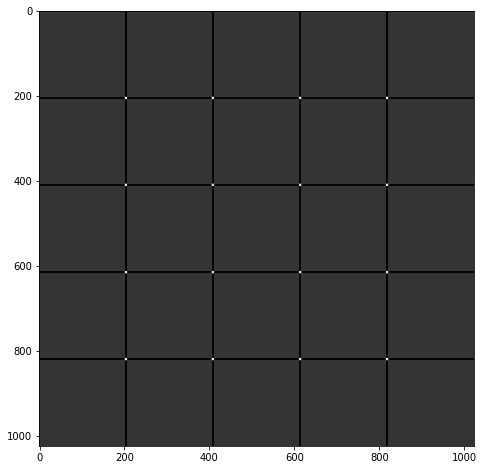

In [8]:
plt.figure(figsize=(8,8))
plt.imshow(result, cmap="gray")

#### Harris Corner Detector

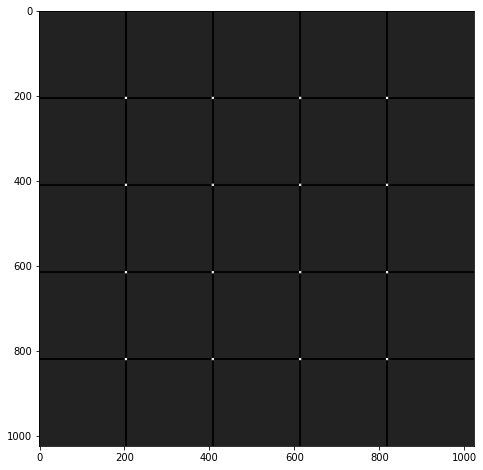

In [9]:
image = cv.imread("checkerboard.png")
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

image_result = cv.cornerHarris(image_gray, 5, 5, 0.04)

plt.figure(figsize=(8,8))
plt.imshow(image_result, cmap="gray")

### SIFT

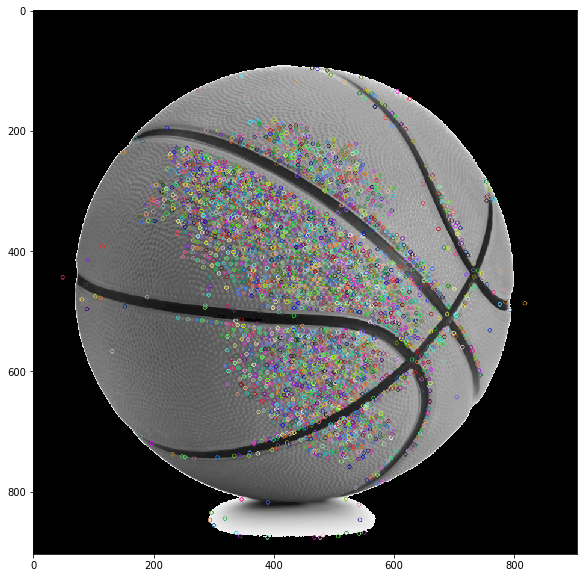

In [28]:
image = cv.imread("basketball_1.png", 0)

sift = cv.SIFT_create()

keypoints, descriptors = sift.detectAndCompute(image, None)

result = cv.drawKeypoints(image, keypoints, result)

plt.figure(figsize=(10,10))
plt.imshow(result, cmap="gray")

In [29]:
image_1 = cv.imread("basketball_1.png", 0)
image_2 = cv.imread("basketball_2.png", 0)

sift = cv.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(image_1, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(image_2, None)

print("Count for Image 1: ",len(keypoints_1))
print("Count for Image 2: ",len(keypoints_2))

Count for Image 1:  4561
Count for Image 2:  30286


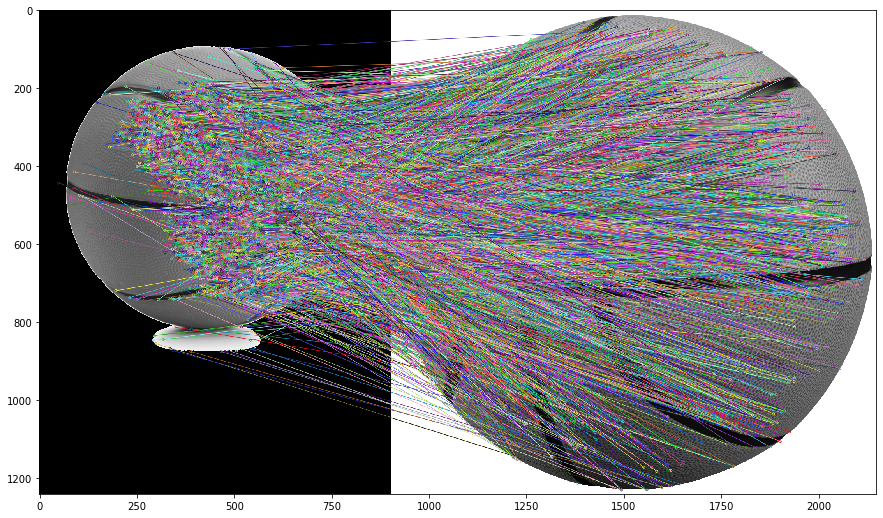

In [31]:
bf = cv.BFMatcher(cv.NORM_L1)
matches = bf.match(descriptors_1, descriptors_2)

plt.figure(figsize=(15,15))

result = cv.drawMatches(image_1, keypoints_1, image_2, keypoints_2, matches, result, flags=2)
plt.imshow(result)

#### SIFT Rotation Invariant

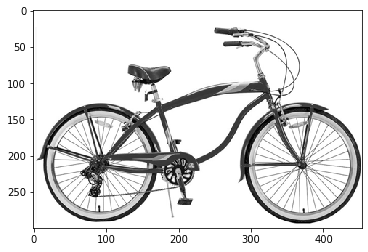

In [32]:
image = cv.imread("bicycle.bmp", 0)

plt.imshow(image, cmap="gray")

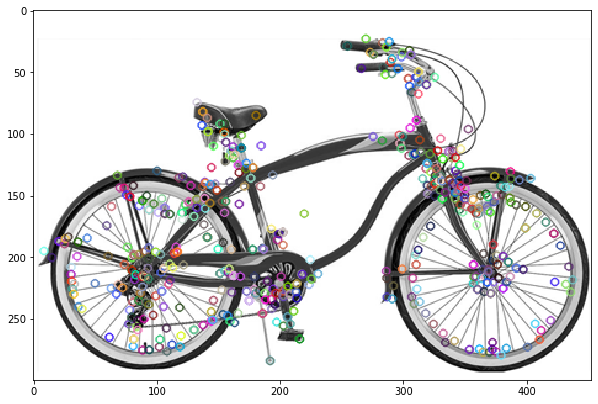

In [33]:
sift = cv.SIFT_create()

keypoints, descriptors = sift.detectAndCompute(image, None)

result = cv.drawKeypoints(image, keypoints, result)

plt.figure(figsize=(10,10))
plt.imshow(result)

In [38]:
image_rotate = cv.rotate(image, cv.ROTATE_90_CLOCKWISE)

keypoints_1, descriptors_1 = sift.detectAndCompute(image, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(image_rotate, None)

print("Count of Image 1:", len(keypoints_1))
print("Count of Rotated image:", len(keypoints_2))

Count of Image 1: 512
Count of Rotated image: 533


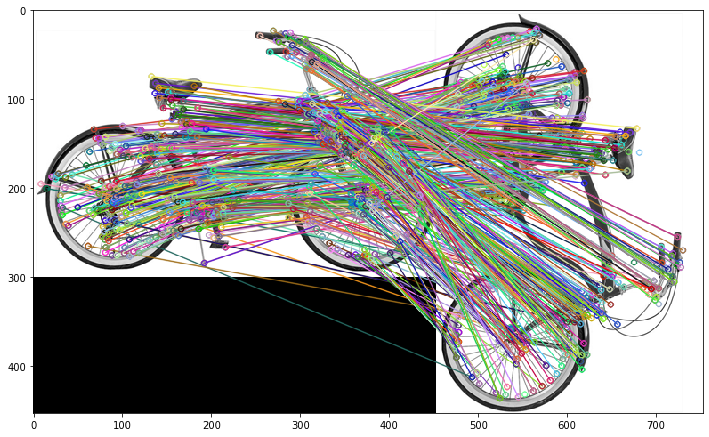

In [41]:
bf = cv.BFMatcher()

matches = bf.match(descriptors_1, descriptors_2)

result = cv.drawMatches(image, keypoints_1, image_rotate, keypoints_2, matches, result)

plt.figure(figsize=(12,12))

plt.imshow(result)